# DEMO

Zbiór danych zawiera trajektorie cząstek dla różnych rodzajów dyfuzji z anomaliami. Zadanie polegało na klasyfikacji rodzaju dyfuzji na podstawie trajektorii 2D cząstki. Każdy rekord przedstawia trajektorię jednej cząstki. Pozycje w trajektorii są dane jako punkty 2D w przestrzeni euklidesowej. Sekwencję takich pozycji traktujemy jako trajektorię, czyli to jak cząstka porusza się w przestrzeni.

### Pliki źródłowe:

X_train.npy - zbiór treningowy\
y_train.npy - etykiety dla zbioru treningowego

X_val.npy - zbiór walidacyjny\
y_val.npy - etykiety dla zbioru walidacyjnego

X_test.npy - zbiór testowy\
Y_test_predictions.csv - indeksy i etykiety uzyskane dla zbioru testowego

gru_logs/ - folder zawierający logi z procesu uczenia\
GRU.pt - zapisany model

model_lightning.py - moduł z definicją klasy modelu\
utils_lightning.py - funkcje pomocnicze do załadowania danych\
tests.py - funkcje do predykcji etykiet dla danych testowych\
main.py - główny plik programu

### Przykładowe predykcje:

Potrzebne funkcje i biblioteki:

In [25]:
import yaml
import torch
import numpy as np
import matplotlib.pyplot as plt
from model_lightning import LitModel
from utils_lightning import load_test_data

Parametry modelu:

In [26]:
with open("gru_logs/lightning_logs/version_0/hparams.yaml") as f:
    hparams = yaml.safe_load(f)

Załadowanie danych:

In [27]:
dataset, dataloader = load_test_data()

Załadowanie modelu:

In [28]:
model = LitModel(hparams['num_layers'], hparams['hidden_size'], hparams['input_size'], hparams['num_classes'], hparams['batches'])
model.load_state_dict(torch.load('GRU.pt'))
model.eval()

LitModel(
  (model): GRU(2, 300, num_layers=2, batch_first=True)
  (fc): Linear(in_features=300, out_features=5, bias=True)
  (train_ac): Accuracy()
  (val_ac): Accuracy()
)

Losowe predykcje:

In [29]:
indices = [np.random.randint(0, len(dataset)) for _ in range(9)]
predictions = []

for idx in indices:
    sample = dataset.__getitem__(idx)[0].reshape(1, 300, 2)
    prediction = str(int(torch.argmax(model(sample))))
    predictions.append(prediction)    

Wykresy:

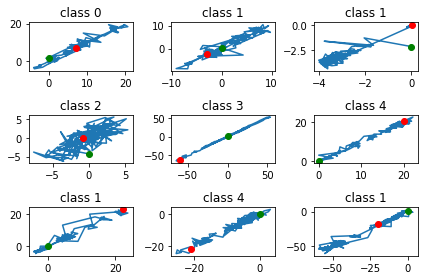

In [30]:
fig, axs = plt.subplots(3, 3)
axx = 0
axy = 0
for i, idx in enumerate(indices):
    if axx == 3:
        axx = 0
        axy += 1
    axs[axx, axy].set_title(f"class {predictions[i]}")
    x = np.array(dataset.__getitem__(idx)[0])[:,0]
    y = np.array(dataset.__getitem__(idx)[0])[:,1]
    axs[axx, axy].plot(x, y)
    axs[axx, axy].plot(x[0], y[0], 'og')
    axs[axx, axy].plot(x[-1], y[-1], 'or')
    axx += 1
fig.tight_layout()
plt.show()

### Wyniki uczenia (tensorboard):

In [38]:
%reload_ext tensorboard
%tensorboard --logdir=gru_logs --host=localhost